In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Power consumption data

https://www.kaggle.com/uciml/electric-power-consumption-data-set#household_power_consumption.txt![image.png](attachment:image.png)

In [2]:
power_consumption_data = pd.read_csv("datasets/power_consumption_data.csv", sep = ";")

power_consumption_data.head(5)

,Id,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
power_consumption_data.tail(5)

,Id,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
65529,65529,31/1/2007,05:33:00,0.350,0.138,241.090,1.600,0.000,0.000,0.0
65530,65530,31/1/2007,05:34:00,0.344,0.134,240.490,1.600,0.000,0.000,0.0
65531,65531,31/1/2007,05:35:00,0.344,0.138,241.190,1.600,0.000,0.000,0.0
65532,65532,31/1/2007,05:36:00,0.344,0.140,241.470,1.600,0.000,0.000,0.0
65533,65533,31/1/2007,05:37:00,0.342,0.140,241.640,1.600,0.000,0.000,0.0


In [4]:
power_consumption_data.shape

(65534, 10)

In [5]:
power_consumption_data = power_consumption_data.head(5000)

power_consumption_data.shape

(5000, 10)

In [6]:
global_intensity_column = pd.to_numeric(power_consumption_data["Global_intensity"],
                                        errors="coerce",
                                        downcast=None)

In [7]:
global_intensity_column.isna().sum()

0

### Autocorrelation over 12 hours

In [9]:
global_intensity_column.autocorr(lag = 60 * 12)

0.13918005918467577

### Autocorrelation over 24 hours

In [13]:
global_intensity_column.autocorr(lag = 60 * 24)

0.5247113016376833

### Autocorrelation over one hour

In [14]:
global_intensity_column.autocorr(lag = 60)

0.4916110763215623

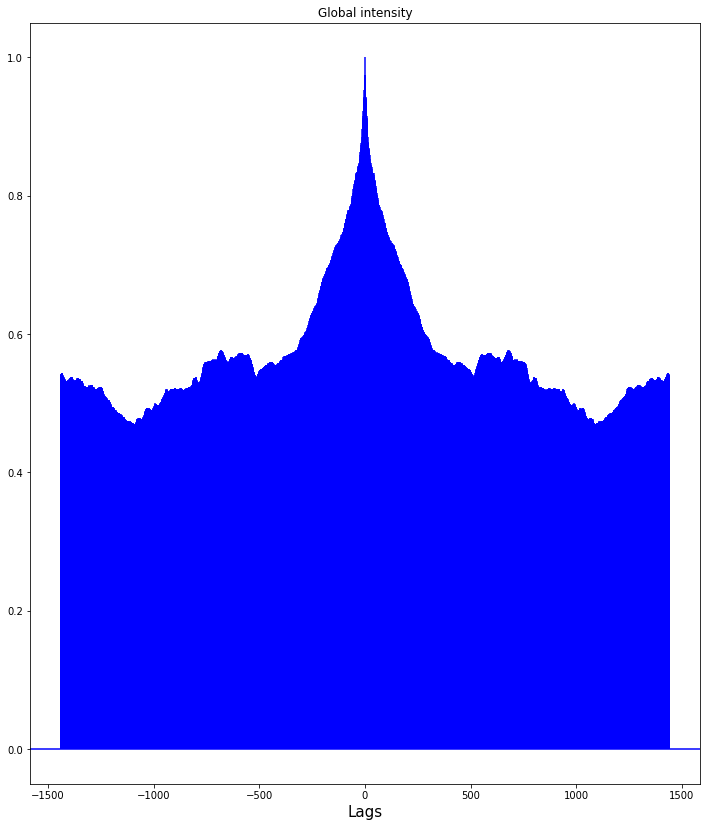

In [15]:
fig, ax1 = plt.subplots(1, figsize = (12, 14))

ax1.acorr(global_intensity_column , maxlags = 60 * 24, color = "blue")

ax1.title.set_text("Global intensity")
ax1.set_xlabel("Lags", fontsize = 15)

plt.show()